In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import RFE

import pandas as pd
import seaborn as sns
import random as rnd
import math

In [2]:
dataset = pd.read_csv('dataset/Biomass_History.csv')
print(len(dataset))
dataset = dataset.drop(columns="Index")
dataset[:10]

2418


,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885
5,24.66818,71.72956,17.416639,35.811001,26.003826,27.348482,29.599268,22.026114,23.592617,41.749001
6,24.66818,71.80919,23.568657,37.371216,38.298550,27.838022,40.779961,32.014874,37.771797,55.003929
7,24.66818,71.88882,48.345234,91.215836,91.906342,41.121754,57.266411,60.263412,72.291153,29.411613
8,24.66818,71.96844,58.784283,50.206898,60.707321,37.598999,59.462139,38.788315,31.312796,37.497009
9,24.66818,72.04807,67.907379,68.375999,87.026680,54.602242,78.118126,44.796188,36.008152,52.549976


In [3]:
rainfall = {'2010': 368.61, '2011': 429.95, '2012': 281.61, '2013':318.21, '2014':266.87, '2015':293.29, '2016':218.95, '2017':439.01}

<AxesSubplot: >

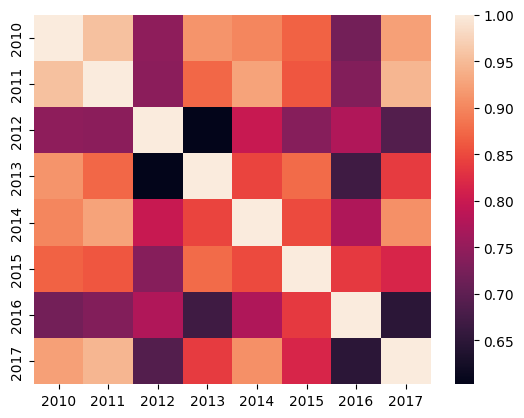

In [4]:
df_joy = dataset[0:].drop(columns=['Latitude', 'Longitude',])
sns.heatmap(df_joy.corr())

In [5]:
df = dataset[0:].drop(columns=[])

# df['2018'] = y_pred
df['mean'] = 2
arr = [np.mean(df.iloc[i]) for i in range(len(df))]
for i in range(len(df)):
    df['mean'][i] = arr[i] 
    
df['max'] = 2
arr = [np.mean([max(df.iloc[i]),np.mean(df.iloc[i])]) for i in range(len(df))]
for i in range(len(df)):
    df['max'][i] = arr[i] 
    
# df['std'] = 2
# arr = [np.std(df.iloc[i]) for i in range(len(df))]
# for i in range(len(df)):
#     df['std'][i] = arr[i]

# df['rainfall 2011'] = 528.183/100
# df['rainfall 2012'] = 427.98/100
# df['rainfall 2013'] = 372.183/100
# df['rainfall 2014'] = 301.21/100
# df['rainfall 2015'] = 270.75/100
# df['rainfall 2016'] = 248.96/100
# df['temperature 2016'] = 41.82/100
# df['temperature 2015'] = 42/100

df[:20]

C:\Users\user\AppData\Local\Temp\ipykernel_5224\2361939652.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean'][i] = arr[i]
C:\Users\user\AppData\Local\Temp\ipykernel_5224\2361939652.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max'][i] = arr[i]


,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017,mean,max
0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296,14.597555,42.964497
1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945,31.136486,51.273773
2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232,51.355232,62.279232
3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352,65.497499,83.282425
4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885,23.040434,47.345187
5,24.66818,71.72956,17.416639,35.811001,26.003826,27.348482,29.599268,22.026114,23.592617,41.749001,29.267699,50.498629
6,24.66818,71.80919,23.568657,37.371216,38.298550,27.838022,40.779961,32.014874,37.771797,55.003929,35.556761,53.682976
7,24.66818,71.88882,48.345234,91.215836,91.906342,41.121754,57.266411,60.263412,72.291153,29.411613,53.670796,72.788569
8,24.66818,71.96844,58.784283,50.206898,60.707321,37.598999,59.462139,38.788315,31.312796,37.497009,42.999489,57.483965
9,24.66818,72.04807,67.907379,68.375999,87.026680,54.602242,78.118126,44.796188,36.008152,52.549976,53.463727,70.245203


In [6]:
df1 = dataset[0:].drop(columns=['Latitude','Longitude',])
df1['mean'] = 2

# df1['2018'] = y_pred
arr1 = [np.mean(df1.iloc[i]) for i in range(len(df1))]
for i in range(len(df1)):
    df1['mean'][i] = arr1[i] 
    
df1['max'] = 2
arr = [np.mean([max(df.iloc[i]),np.mean(df.iloc[i])]) for i in range(len(df1))]
for i in range(len(df1)):
    df1['max'][i] = arr[i] 
        
# df1['std'] = 2
# arr = [np.std(df1.iloc[i]) for i in range(len(df1))]
# for i in range(len(df1)):
#     df1['std'][i] = arr[i]

# df1['rainfall 2012'] = 427.98/100
# df1['rainfall 2013'] = 372.183/100
# df1['rainfall 2014'] = 301.21/100
# df1['rainfall 2015'] = 270.75/100
# df1['rainfall 2016'] = 248.78/100
# df1['rainfall 2017'] = 409.82/100
# df1['temperature 2017'] = 43.82/100
# df1['temperature 2016'] = 41.82/100

df1.shape, df.shape

C:\Users\user\AppData\Local\Temp\ipykernel_5224\4113942935.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['mean'][i] = arr1[i]
C:\Users\user\AppData\Local\Temp\ipykernel_5224\4113942935.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['max'][i] = arr[i]


((2418, 10), (2418, 12))

In [7]:
# sns.heatmap(df.corr())

In [8]:
df[:3]

,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017,mean,max
0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296,14.597555,42.964497
1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945,31.136486,51.273773
2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232,51.355232,62.279232


In [9]:
X = df[['Latitude', 'Longitude', '2010']].values
Y = df.drop(columns=['Latitude', 'Longitude', '2010']).values

In [10]:
# model = MLPRegressor(hidden_layer_sizes=(128,256), alpha=0.01, max_iter=35000, solver='lbfgs')
# model = RandomForestRegressor(n_estimators=100, max_depth=500)
model = KNeighborsRegressor()

transforms = list()
transforms.append(('mms', MinMaxScaler()))
transforms.append(('ss', StandardScaler()))
# transforms.append(('asl', MaxAbsScaler()))
transforms.append(('rs', RobustScaler()))
transforms.append(('qt', QuantileTransformer(n_quantiles=50)))
transforms.append(('pw', PowerTransformer(method='yeo-johnson')))

fu = FeatureUnion(transforms)
# rfe = RFE(estimator=model, n_features_to_select=10)

steps = list()
steps.append(('fu', fu))
steps.append(('model', model))

pipeline = Pipeline(steps=steps)

In [11]:
pipeline.fit(X, Y)

Pipeline(steps=[('fu',
                 FeatureUnion(transformer_list=[('mms', MinMaxScaler()),
                                                ('ss', StandardScaler()),
                                                ('rs', RobustScaler()),
                                                ('qt',
                                                 QuantileTransformer(n_quantiles=50)),
                                                ('pw', PowerTransformer())])),
                ('model', KNeighborsRegressor())])

In [53]:
X_test = df[['Latitude', 'Longitude', '2010']].values
X_test.shape, X.shape

((2418, 3), (2418, 3))

In [54]:
y_test = dataset['2017'].values

y_pred =  pipeline.predict(X_test)

print(f"Sum of Predicted: {sum(y_pred)}, Actual Sum :{sum(y_test)}")

Sum of Predicted: [365099.34928117 265335.07949578 391575.79092231 382173.42947601
 321800.07599168 274166.35507578 384110.83919608 269558.59048106
 400847.47142485], Actual Sum :384857.0210760393


In [56]:
a = df.drop(columns=['Latitude', 'Longitude', '2010']).values
[sum(i) for i in a]

[111.65979151322728,
 302.8025915722727,
 535.5515092372727,
 711.0394988168182,
 210.85890038409093,
 285.8966364313637,
 358.318085205,
 569.9358850936363,
 416.0569303654545,
 545.1862935040909,
 155.27363818972725,
 88.26745353654545,
 81.09525143363635,
 51.13837861572728,
 54.10555115300001,
 404.84725836272725,
 714.2862775068182,
 1341.9933927590905,
 1180.3805219818182,
 677.1333927481819,
 882.5653207109092,
 971.919288765,
 1032.1688929795455,
 1187.8434710954546,
 1191.7591902431818,
 589.3065772122727,
 426.2973620572727,
 335.7763841972727,
 90.24994308995454,
 51.02260642181818,
 300.77265920363635,
 872.049625070909,
 1286.6308028045455,
 1146.945274240909,
 1149.767701025,
 1092.060809490909,
 1428.7039832590908,
 1345.7626235136363,
 843.0122943709091,
 623.8625157313636,
 568.9381108354545,
 731.0236607263637,
 876.3020241763636,
 287.58511500318184,
 67.92850915236363,
 51.781880695,
 53.783817993499994,
 209.2159667385909,
 845.0679460954544,
 945.2851003390908,
 9

In [32]:
dad = 0

y_pred = [max(0, i) for i in y_pred]
for i in range(len(y_pred)):
    dad += abs(y_pred[i]-y_test[i])
dad

97322.03664900675

In [21]:
# rd = MLPRegressor(hidden_layer_sizes=(128,256), alpha=0.025, max_iter=15000)
# rd = RandomForestRegressor()
# rd = GradientBoostingRegressor()

# rd.fit(X, Y)
# X_test = df1.values
# X_test.shape

# y_test = df_joy['2017'].values

# y_pred = rd.predict(X_test)
# sum(y_pred)

In [22]:
sum(y_test)

384857.0210760393

In [23]:
dad = 0
y_pred = rd.predict(X_test)
y_pred = [max(0, i) for i in y_pred]
for i in range(len(y_pred)):
    dad += abs(y_pred[i]-y_test[i])
dad

NameError: name 'rd' is not defined

In [ ]:
print(Y[0])

In [33]:
data = {
    "Predictions": y_pred
}

ds = pd.DataFrame(data)
ds[:50]

,Predictions
0,7.070266
1,28.744179
2,52.059357
3,70.791134
4,17.205780
5,25.254175
6,32.541285
7,57.989695
8,41.699844
9,50.847705


In [26]:
dataset[:50]

,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885
5,24.66818,71.72956,17.416639,35.811001,26.003826,27.348482,29.599268,22.026114,23.592617,41.749001
6,24.66818,71.80919,23.568657,37.371216,38.298550,27.838022,40.779961,32.014874,37.771797,55.003929
7,24.66818,71.88882,48.345234,91.215836,91.906342,41.121754,57.266411,60.263412,72.291153,29.411613
8,24.66818,71.96844,58.784283,50.206898,60.707321,37.598999,59.462139,38.788315,31.312796,37.497009
9,24.66818,72.04807,67.907379,68.375999,87.026680,54.602242,78.118126,44.796188,36.008152,52.549976


In [34]:
ds.to_csv('pred_lstm181.csv', index=False)